In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import time

In [3]:
adata = sc.datasets.paul15()

In [4]:
# Select top 1000 highly-variable genes
filter_result = sc.pp.filter_genes_dispersion(adata.X,flavor='cell_ranger',n_top_genes=1000,log=False)
# Subset the genes
adata = adata[:, filter_result.gene_subset]
# Log transformation and scaling
sc.pp.log1p(adata)

C:\anaconda3\Lib\site-packages\scanpy\preprocessing\_simple.py:398: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


         Falling back to preprocessing with `sc.pp.pca` and default params.


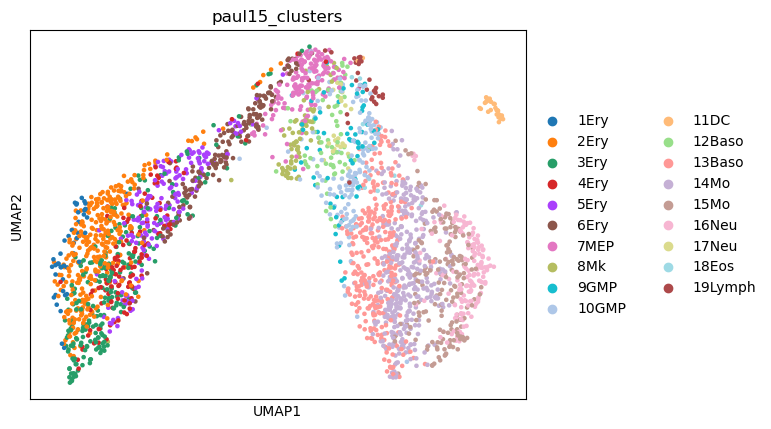

In [5]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['paul15_clusters'])

In [6]:
X = adata.X
data_clusters = adata.obs['paul15_clusters']
zip_types = dict(zip(data_clusters.cat.categories,adata.uns['paul15_clusters_colors']))
cell_clusters  =  [zip_types[i] for i in data_clusters.values]

In [7]:
var_names = adata.var_names
obs_names = adata.obs_names

In [9]:
adata.write_h5ad("paul15.h5ad")

In [10]:
adata = sc.read_h5ad("paul15.h5ad")
adata

AnnData object with n_obs × n_vars = 2730 × 1002
    obs: 'paul15_clusters'
    uns: 'iroot', 'log1p', 'neighbors', 'paul15_clusters_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'